*WORK IN PROGRESS*

Install Libraries.

In [1]:
import pandas as pd
import yfinance as yf # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Load Data.

In [2]:
# tickers_ = ['SPY','NKE']
SPY_df = yf.download(tickers='SPY', auto_adjust=False)
# NKE_df = yf.download(tickers='NKE', auto_adjust=False)
INTC_df = yf.download(tickers='INTC', auto_adjust=False)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
logreturns = np.log(SPY_df['Adj Close']) - np.log(SPY_df['Adj Close'].shift(1))
SPY_df['LogReturns'] = logreturns

In [4]:
logreturns = np.log(INTC_df['Adj Close']) - np.log(INTC_df['Adj Close'].shift(1))
INTC_df['LogReturns'] = logreturns

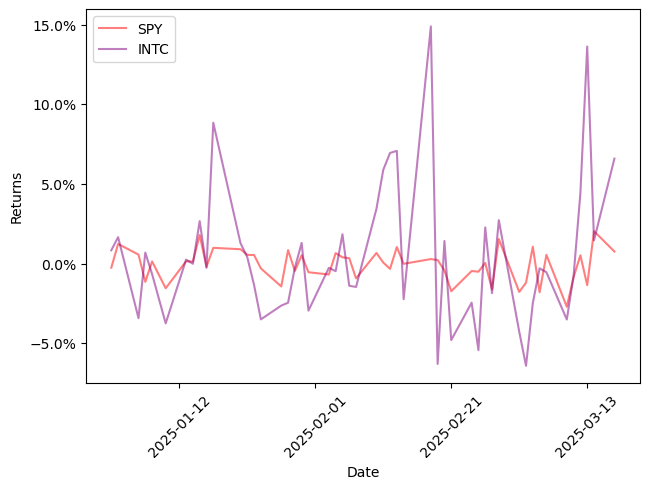

In [5]:
start_date, end_date = '2025-01-01', '2025-03-17'
plt.plot(SPY_df.loc[start_date:end_date,'LogReturns']*(100), color='red',label='SPY',alpha=0.5);
plt.plot(INTC_df.loc[start_date:end_date,'LogReturns']*(100), color='purple', label='INTC',alpha=0.5);
plt.legend();

plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.tight_layout()

plt.xlabel('Date');
plt.ylabel('Returns');

# Strategy 1 - Covered Calls